<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se toman 257 registros con Opiniones de usuarios sobre una app

Se utilizaran las columnas

**wordcount:** cantidad de palabras utilizadas 
**sentimentValue:** valor entre -4 y 4
La etiqueta son las estrellas dadas por los usuarios entre 1 y 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/reviews_sentiment.csv', sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [ ]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


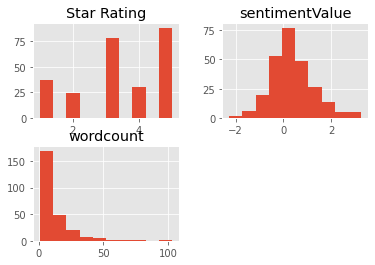

In [ ]:
dataframe.hist()
plt.show()

In [ ]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


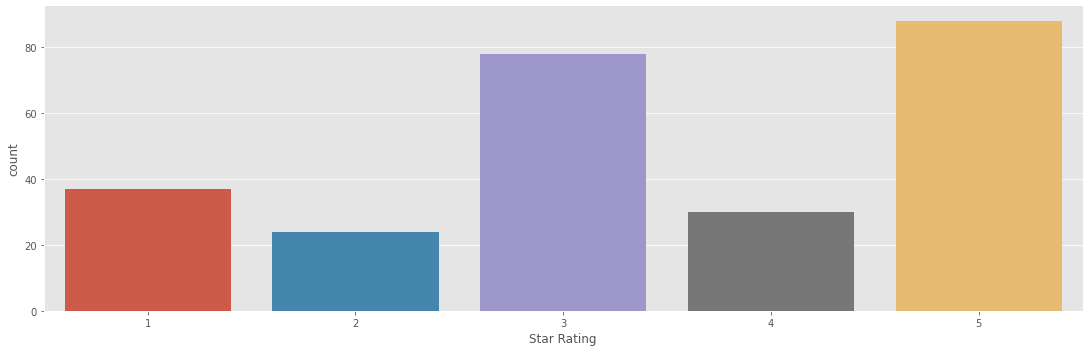

In [ ]:
sb.factorplot('Star Rating', data=dataframe, kind='count', aspect=3)

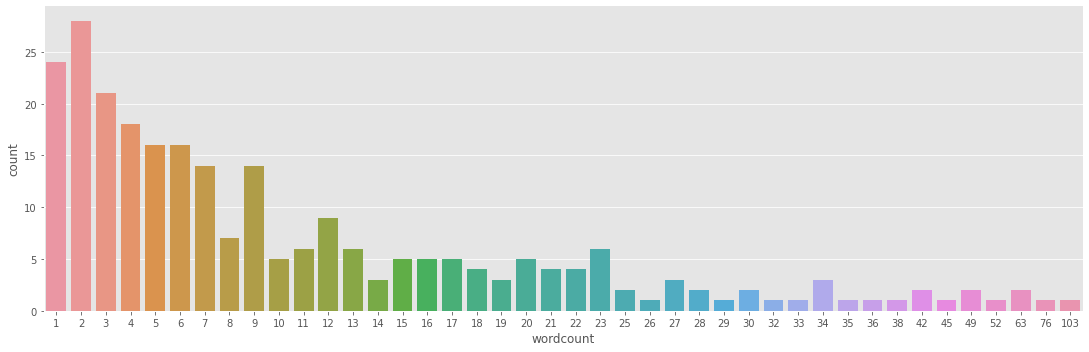

In [ ]:
sb.factorplot('wordcount', data=dataframe, kind='count', aspect=3)

In [ ]:
X = dataframe[['wordcount', 'sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on test set: {:2f}'.format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set: 0.895833
Accuracy of K-NN classifier on test set: 0.861538


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



In [ ]:
#Clasificación

h = .02

#Colormaps
cmap_light = ListedColormap(['#FFAAAA', 
                             '#ffcc99',
                             '#ffffb3',
                             '#b3ffff',
                             '#c2f0c2'])

cmap_bold = ListedColormap(['#FF0000',
                            '#ff9933',
                            '#FFFF00',
                            '#00ffff',
                            '#00FF00'])

clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

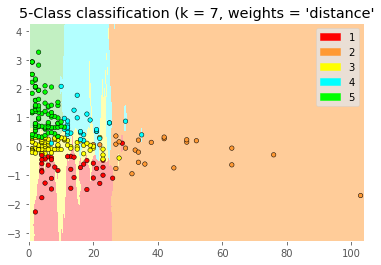

In [ ]:
# Graficando

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3, patch4])

plt.title("5-Class classification (k = %i, weights = '%s'" % (n_neighbors, 'distance'))

plt.show()

### Elegir el mejor valor de k

([<matplotlib.axis.XTick at 0x7f21f23381d0>,
 <a list of 5 Text major ticklabel objects>)

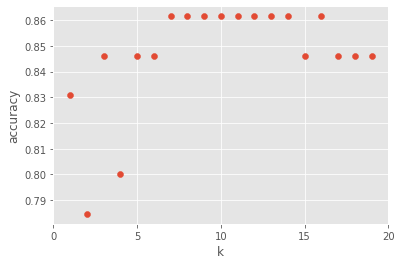

In [ ]:
k_range = range(1, 20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
#Claificando nuevo dato

#Clase
print(clf.predict([[5, 10]]))

#Con probabilidad
print(clf.predict_proba([[20, 0.0]]))

[5]
[[0.00381998 0.02520212 0.97097789 0.         0.        ]]
